# The dark matter halo of a galaxy from Illustris TNG
## Seha Lee
### Reading and plotting the data 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import astropy.units as u
import astropy.constants as const


In [3]:
Array = np.loadtxt( "/Users/sehalee/Documents/1-Universität Potsdam/24SS/CompAstro_Advanced/BonusExercise2022_DarkMatter/GalaxyFromIllustrisTNG50Dark_DM_Subhalo852966.txt" )
Pos = Array[:,0:3]
Mass = Array[:,3]

####
#The four columns are:
  # x coordinate of DM particle: in units of kpc
  # y coordinate of DM particle: in units of kpc
  # z coordinate of DM particle: in units of kpc
  # M: mass in units of Msun

# The coordinates are chosen such that the galaxy centre is in (0,0,0)
####

In [4]:
print("The shape of the array is: ", Array.shape)
print("The first 5 rows of the array are: \n x,y,z coordinates and the mass \n", Array[0:5,:])

The shape of the array is:  (2323050, 4)
The first 5 rows of the array are: 
 x,y,z coordinates and the mass 
 [[ 9.64088456e-02 -6.46346007e-02  5.53424159e-02  5.38464142e+05]
 [ 1.58756977e-01  3.97111692e-02 -1.27772402e-02  5.38464142e+05]
 [ 1.81569442e-01 -2.05996550e-02 -1.74689210e-01  5.38464142e+05]
 [ 1.07145711e-01 -1.99075073e-01  1.33866130e-01  5.38464142e+05]
 [ 8.82361332e-02 -5.18074682e-04  4.26508561e-02  5.38464142e+05]]


In [5]:
print("The maximum of each coordinates are: \n", np.max(Pos, axis=0),'\n')
print("The minimum of each coordinates are: \n", np.min(Pos, axis=0),'\n')
print("The size range of each coordinates are: \n", np.max(Pos, axis=0) - np.min(Pos, axis=0))

The maximum of each coordinates are: 
 [348.125691 403.041627 304.655274] 

The minimum of each coordinates are: 
 [-254.37297  -287.058823 -311.243398] 

The size range of each coordinates are: 
 [602.498661 690.10045  615.898672]


### **Task 1** Plot DM mass projections of the galaxy halo (in units of M⊙kpc−2). Do (x, y), (x, z) and (y, z) projections. Choose a box size of ±300 kpc. Hint: Use plt.hist2d to create the projections.


In [6]:
r = int(np.abs(np.min(Pos[:,0]))) # x-axis minimum into positive integer
print("The range of coordinates is from -", r, "to", r)

The range of coordinates is from - 254 to 254


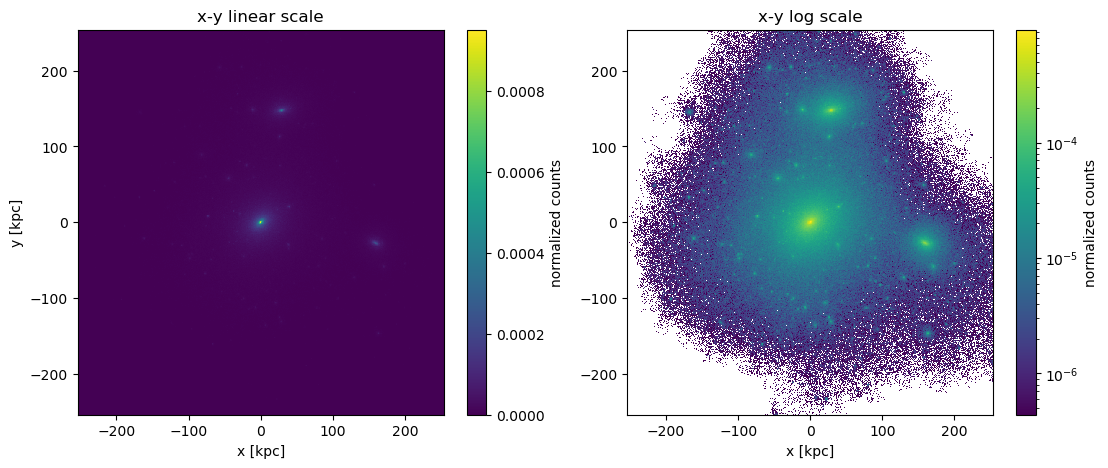

In [7]:
# Trial 1
#"density = True" makes normalized counts, not the physical density we want(mass per area)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
ranges = [[-r, r], [-r, r]]
bins = r*2

# linear scale
hist1 = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=True, norm ='linear') # weights = Mass/Area
axes[0].set_title('x-y linear scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist1[3], ax=axes[0], label='normalized counts')

# log scale
hist2 = axes[1].hist2d(Pos[:,0], Pos[:,1], bins = bins,  range=ranges, weights=Mass, density=True, norm ='log')
axes[1].set_title('x-y log scale')
axes[1].set_xlabel('x [kpc]')
fig.colorbar(hist2[3], ax=axes[1], label='normalized counts')

plt.show()

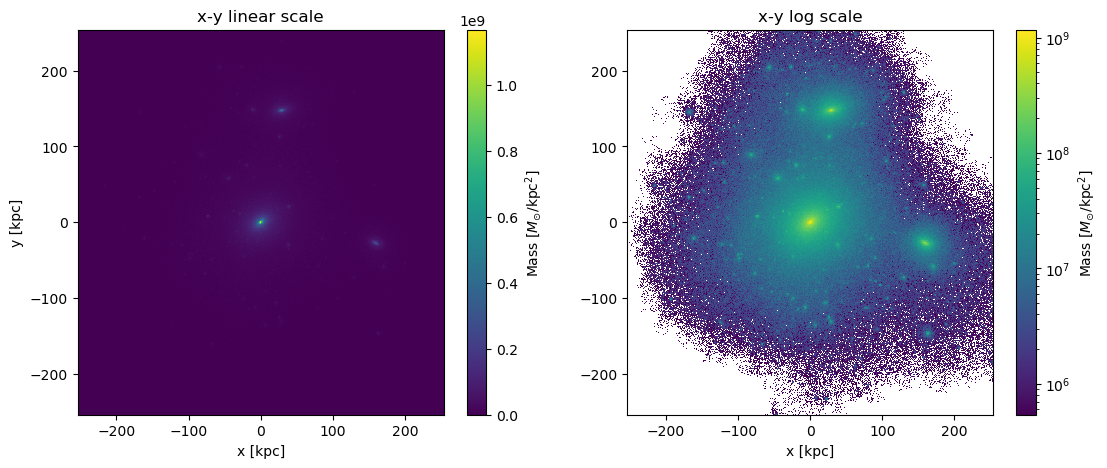

In [8]:
# Trial 2
# (x,y) projection of the galaxy in linear and log scale: log looks better 

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
r = int(np.abs(np.min(Pos[:,0]))) # x-axis minimum into positive integer
ranges = [[-r, r], [-r, r]]
bins = r*2

# linear scale
hist1 = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='linear') # weights = Mass/Area
axes[0].set_title('x-y linear scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist1[3], ax=axes[0], label='Mass [$M_{\odot}$/kpc$^2$]')

# log scale
hist2 = axes[1].hist2d(Pos[:,0], Pos[:,1], bins = bins,  range=ranges, weights=Mass, density=False, norm ='log')
axes[1].set_title('x-y log scale')
axes[1].set_xlabel('x [kpc]')
fig.colorbar(hist2[3], ax=axes[1], label='Mass [$M_{\odot}$/kpc$^2$]')

plt.show()

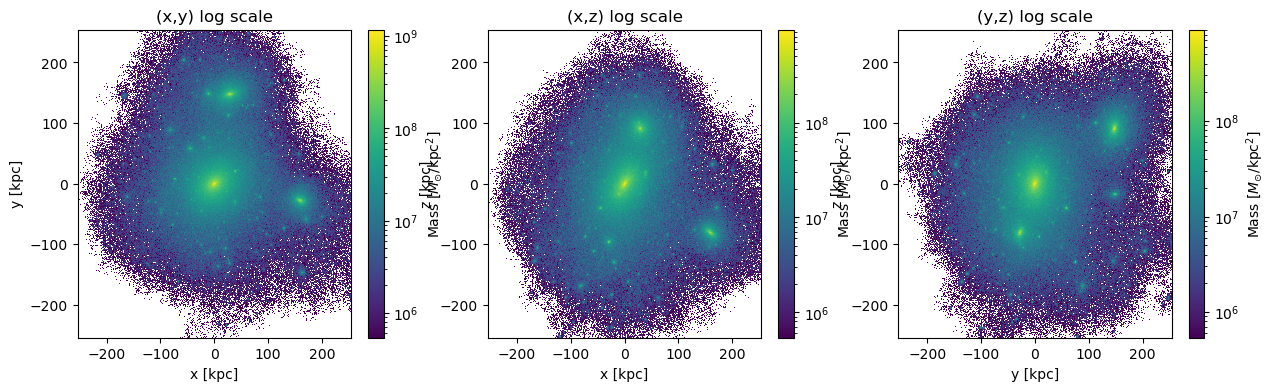

In [9]:
### Final Answer ###
# (x,y), (x,z), and (y,z) projection of the galaxy in linear and log scale
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
r = int(np.abs(np.min(Pos[:,0])))
ranges = [[-r, r], [-r, r]]
bins = r*2

hist_xy = axes[0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0].set_title('(x,y) log scale')
axes[0].set_xlabel('x [kpc]')
axes[0].set_ylabel('y [kpc]')
fig.colorbar(hist_xy[3], ax=axes[0], label='Mass [$M_{\odot}$/kpc$^2$]')

hist_xz = axes[1].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1].set_title('(x,z) log scale')
axes[1].set_xlabel('x [kpc]')
axes[1].set_ylabel('z [kpc]')
fig.colorbar(hist_xz[3], ax=axes[1], label='Mass [$M_{\odot}$/kpc$^2$]')

hist_yz = axes[2].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2].set_title('(y,z) log scale')    
axes[2].set_xlabel('y [kpc]')
axes[2].set_ylabel('z [kpc]')
fig.colorbar(hist_yz[3], ax=axes[2], label='Mass [$M_{\odot}$/kpc$^2$]')
plt.show()

### **Task 2** Mark the locations of these galaxies in the projections from Task 1. Use circles or "x" symbols as markers.


In [10]:
# Trial 1
# Getting the locations of local maxima of the histogram by comparing with the 4 neighbors
# Too many miniscule maxima are found!

def local_max0(hist):
    maxima = np.zeros((0,2))
    for i in range(1, hist[0].shape[0]-1):
        for j in range(1, hist[0].shape[1]-1):
            if hist[0][i,j] >= np.max([hist[0][i-1,j], hist[0][i+1,j], hist[0][i,j-1], hist[0][i,j+1]]):
                x_center = 0.5 * (hist[1][i] + hist[1][i+1])
                y_center = 0.5 * (hist[2][j] + hist[2][j+1])
                maxima = np.vstack([maxima, [x_center, y_center]])
    return maxima


# first 20 maxima
#print(local_max0(hist_xy)[0:20])

In [11]:
# the location of the maxima using scatter plot 
#plt.scatter(local_max0(hist_xy)[:,0], local_max0(hist_xy)[:,1], color='skyblue', s=1)

(100, 2)


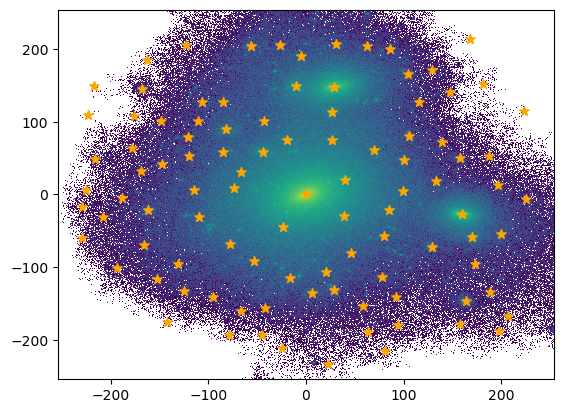

In [12]:
#Trial 2
# The min_distance parameter is adjustable
# Avoid finding too many miniscule maxima

from skimage.feature import peak_local_max

def local_max1(hist, min_distance=20):
    # Find peaks
    coordinates = peak_local_max(hist[0], min_distance=min_distance)
    
    # Calculate the center of each peak bin
    maxima = np.zeros((len(coordinates), 2))
    for i, (r, c) in enumerate(coordinates):
        x_center = 0.5 * (hist[1][r] + hist[1][r+1])
        y_center = 0.5 * (hist[2][c] + hist[2][c+1])
        maxima[i] = [x_center, y_center]
    

    return maxima

#print(local_max1(hist_xy))
print(local_max1(hist_xy).shape)

plt.hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
plt.scatter(local_max1(hist_xy)[:,0], local_max1(hist_xy)[:,1], color='orange', marker ='*', s=50)

[[  0.5   0.5]
 [ 28.5 147.5]
 [159.5 -27.5]
 [ 39.5  20.5]
 [-10.5 148.5]
 [-19.5  75.5]
 [-44.5  58.5]
 [-73.5   8.5]
 [ 23.5  16.5]
 [ 26.5 113.5]
 [-18.5 -23.5]
 [-37.5  14.5]
 [ 38.5 -29.5]
 [ 22.5 -12.5]
 [-23.5 -44.5]
 [-28.5  11.5]
 [-32.5 -12.5]]
(17, 2)


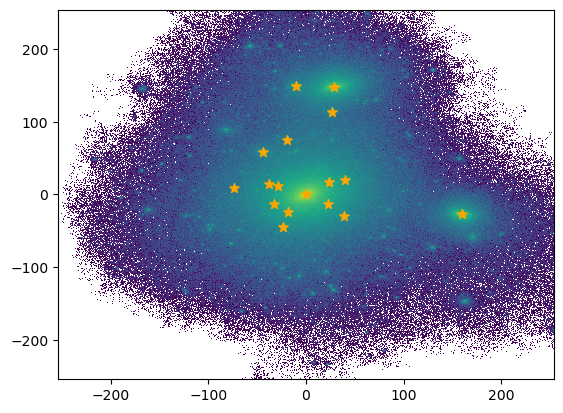

In [13]:
# Trial 3
# The threshold parameter is adjustable to avoid edge pixels

from skimage.feature import peak_local_max

min_distance = 5
threshold = 8E+7

def local_max2(hist, min_distance= min_distance, threshold=threshold):
    # Find peaks
    coordinates = peak_local_max(hist[0], min_distance=min_distance)
    
    # Calculate the center of each peak bin
    maxima = np.zeros((len(coordinates), 2))
    for i, (r, c) in enumerate(coordinates):
        if hist[0][r, c] > threshold:  # threshold here
            x_center = 0.5 * (hist[1][r] + hist[1][r+1])
            y_center = 0.5 * (hist[2][c] + hist[2][c+1])
            maxima[i] = [x_center, y_center]
    
    # Remove zero rows
    maxima = maxima[~np.all(maxima == 0, axis=1)]
    
    return maxima

print(local_max2(hist_xy))
print(local_max2(hist_xy).shape)

plt.hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
plt.scatter(local_max2(hist_xy)[:,0], local_max2(hist_xy)[:,1], color='orange', marker ='*', s=50)

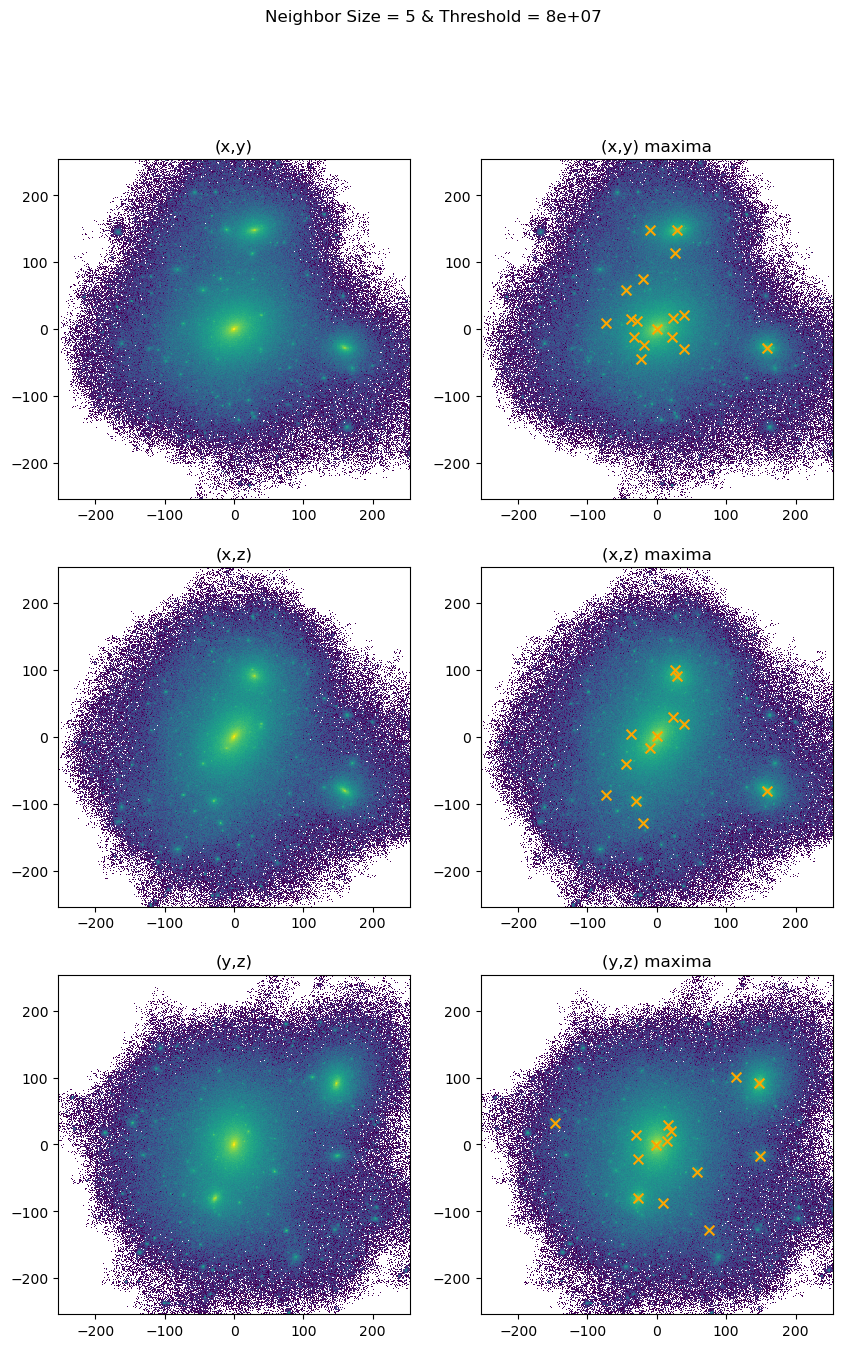

In [14]:
### Trial 4: Final Answer ###
# 6 subplots 2*3 for comparision * each projection

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

axes[0,0].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0,1].hist2d(Pos[:,0], Pos[:,1], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[0,1].scatter(local_max2(hist_xy)[:,0], local_max2(hist_xy)[:,1], color='orange', marker ='x', s=50)
axes[0,0].set_title('(x,y)')
axes[0,1].set_title('(x,y) maxima')

axes[1,0].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1,1].hist2d(Pos[:,0], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[1,1].scatter(local_max2(hist_xz)[:,0], local_max2(hist_xz)[:,1], color='orange', marker ='x', s=50)
axes[1,0].set_title('(x,z)')
axes[1,1].set_title('(x,z) maxima')

axes[2,0].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2,1].hist2d(Pos[:,1], Pos[:,2], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
axes[2,1].scatter(local_max2(hist_yz)[:,0], local_max2(hist_yz)[:,1], color='orange', marker ='x', s=50)
axes[2,0].set_title('(y,z)')
axes[2,1].set_title('(y,z) maxima')

plt.suptitle('Neighbor Size = %s & Threshold = %.0e' % (min_distance, threshold))
plt.show()

In [15]:
print("xy:\n", local_max2(hist_xy).shape,"\n", local_max2(hist_xy))

xy:
 (17, 2) 
 [[  0.5   0.5]
 [ 28.5 147.5]
 [159.5 -27.5]
 [ 39.5  20.5]
 [-10.5 148.5]
 [-19.5  75.5]
 [-44.5  58.5]
 [-73.5   8.5]
 [ 23.5  16.5]
 [ 26.5 113.5]
 [-18.5 -23.5]
 [-37.5  14.5]
 [ 38.5 -29.5]
 [ 22.5 -12.5]
 [-23.5 -44.5]
 [-28.5  11.5]
 [-32.5 -12.5]]


In [16]:
print("xz:\n", local_max2(hist_xz).shape,"\n", local_max2(hist_xz))

xz:
 (12, 2) 
 [[   0.5    0.5]
 [ 159.5  -80.5]
 [  29.5   91.5]
 [ -10.5  -17.5]
 [  26.5  100.5]
 [ -29.5  -95.5]
 [  39.5   19.5]
 [ -44.5  -40.5]
 [ -37.5    4.5]
 [ -19.5 -129.5]
 [ -73.5  -86.5]
 [  23.5   29.5]]


In [17]:
print("yz:\n", local_max2(hist_yz).shape,"\n", local_max2(hist_yz))

yz:
 (14, 2) 
 [[  -0.5   -0.5]
 [ 147.5   91.5]
 [ -27.5  -80.5]
 [  20.5   19.5]
 [ 148.5  -17.5]
 [  58.5  -40.5]
 [  14.5    4.5]
 [ -29.5   14.5]
 [   8.5  -87.5]
 [  75.5 -128.5]
 [ -26.5  -22.5]
 [ 113.5  100.5]
 [  16.5   29.5]
 [-146.5   32.5]]


In [18]:
# print the (x,y,z) coordinates of the center of the galaxy from local_max2(hist_xy) and local_max2(hist_xz) and local_max2(hist_yz)
# if there are (a,b), (b,c), (c,a) coordinates, then the center of the galaxy is (a,b,c)
# save the coordinates of the center of the galaxy in a variable named centers and print it

# centers = []

# for i in range(local_max2(hist_xy).shape[0]):
#     for j in range(local_max2(hist_xz).shape[0]):
#         for k in range(local_max2(hist_yz).shape[0]):
#             if (local_max2(hist_xy)[i][0] == local_max2(hist_xz)[j][0]) and (local_max2(hist_xy)[i][1] == local_max2(hist_yz)[k][0]) and (local_max2(hist_xz)[j][1] == local_max2(hist_yz)[k][1]):
#                 centers.append([local_max2(hist_xy)[i][0], local_max2(hist_xy)[i][1], local_max2(hist_xz)[j][1]])
#                 break

# print("The center of the galaxy is: \n", centers)

##### The result of the code above (it takes 7 minutes to run it):
The center of the galaxy is: 
 [[159.5, -27.5, -80.5], [39.5, 20.5, 19.5], [-10.5, 148.5, -17.5], [-44.5, 58.5, -40.5], [23.5, 16.5, 29.5], [26.5, 113.5, 100.5], [-37.5, 14.5, 4.5]]


In [19]:
# append missed points to the centers manually
centers =  [[159.5, -27.5, -80.5], [39.5, 20.5, 19.5], [-10.5, 148.5, -17.5], [-44.5, 58.5, -40.5], [23.5, 16.5, 29.5], [26.5, 113.5, 100.5], [-37.5, 14.5, 4.5]]

centers.insert(0,[0,0,0])
centers.append([ 28.5, 147.5, 91.5])

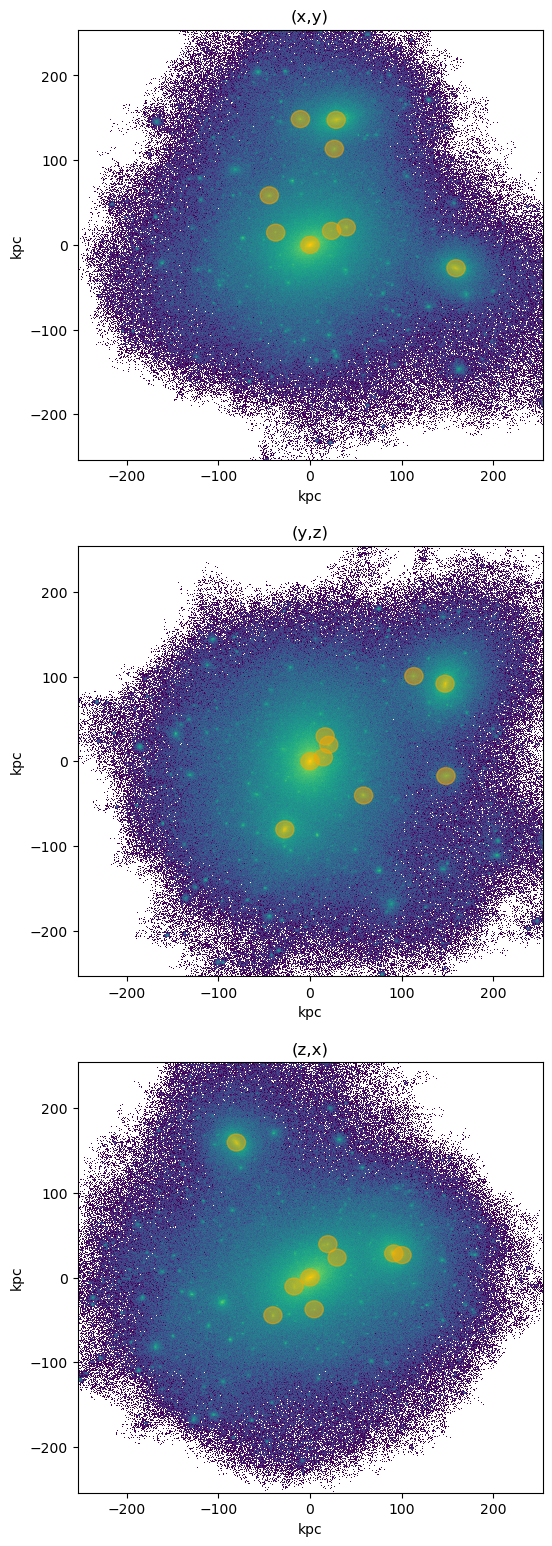

In [20]:
# 10 kpc radius circle around the center of the galaxy
# 2.5 kpc radius circle is not visible in the plot, so enlarged to 10 kpc

fig, axes = plt.subplots(3,1, figsize=(6, 19))

for i in range(3):
    axes[i].hist2d(Pos[:,i], Pos[:,(i+1)%3], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
    for j in range(len(centers)):
        circle = plt.Circle((centers[j][i], centers[j][(i+1)%3]), 10, color='orange', fill=True, alpha=0.5)
        axes[i].add_patch(circle)
    axes[i].set_xlabel('kpc')
    axes[i].set_ylabel('kpc')

axes[0].set_title('(x,y)')
axes[1].set_title('(y,z)')
axes[2].set_title('(z,x)')

plt.show()




### **Task 3** Calculate the DM mass in each of the spherical shells.

##### Calculate the mass in each shell by looping over all bins, and then sum the mass from the DM particles residing in each shell. 
##### A fast method is to use the numpy.digitize function to calculate the bin of each DM particle, and numpy.bin_count to calculate the number of particles in each bin. 
##### Note, that these functions use a convention, where the first bin is an **underflow bin**: it counts the number of particles at a radius smaller than R[0]. The last bin is an **overflow bin** with particles with radius larger than R[-1]. So these bins have to be removed from the out- put of numpy.bin_count to make it compatible with our bin definition (as used by e.g. MidpointShell).


# **Feedback** #1
On page 15, there is a little mistake / bug in the way the bins are set up. You should replace the following

logR = np.linspace(-1.0, np.log10(2.5), 41)

with

logR = np.linspace(-1.0, 2.5, 41)

... otherwise the bins do not reach high enough radii.

In [21]:
logR = np.linspace(-1.0, 2.5, 41) #### changed from np.linspace(-1.0, np.log10(2.5), 41) to  np.linspace(-1.0, 2.5, 41)
R = 10.0**logR * u.kpc
VolumeOfShell = 4.0/3.0 * np.pi * ((R[1:])**3 - (R[:-1])**3)
MidpointShell = 0.5 * (R[1:] + R[:-1])
print(R.shape)
print(R[:5])
print(VolumeOfShell.shape)
print(VolumeOfShell[:5])
print(MidpointShell.shape)
print(MidpointShell[:5])

(41,)
[0.1        0.12232071 0.14962357 0.18302061 0.22387211] kpc
(40,)
[0.00347756 0.00636465 0.01164862 0.02131938 0.03901886] kpc3
(40,)
[0.11116036 0.13597214 0.16632209 0.20344636 0.24885704] kpc


In [22]:
MassInShell = np.zeros((len(centers), len(VolumeOfShell))) #in solar masses

for i in range(len(centers)):
    indices = np.digitize(np.sqrt((Pos[:,0]-centers[i][0])**2 + (Pos[:,1]-centers[i][1])**2 + (Pos[:,2]-centers[i][2])**2), R.value)
    MassInShell[i] = np.bincount(indices, weights=Mass, minlength=len(VolumeOfShell))[1:-1]
    

print(MassInShell.shape) 
print(MassInShell[0])

(9, 40)
[1.07692828e+06 4.84617728e+06 1.34616036e+07 1.13077470e+07
 1.83077808e+07 2.58462788e+07 4.46925238e+07 8.45388703e+07
 1.33000643e+08 2.05693302e+08 3.21463093e+08 4.38848276e+08
 6.50464684e+08 9.35312215e+08 1.28908316e+09 1.79631638e+09
 2.54478154e+09 3.42624734e+09 4.47356009e+09 5.76156632e+09
 7.21380411e+09 9.07258233e+09 1.18693651e+10 1.48971490e+10
 1.84580123e+10 2.26036478e+10 2.80351356e+10 3.49242458e+10
 4.33959021e+10 5.22714066e+10 5.94566721e+10 6.29189965e+10
 6.88275636e+10 7.97363086e+10 8.97495878e+10 1.00882872e+11
 1.55596752e+11 2.15983890e+11 1.02546727e+11 4.23582817e+10]


### **Task 4** Calculate ρ as a function of R, and plot log ρ as a function of log R.

In [23]:
rho_shell = np.zeros((len(centers), len(R)-1)) # SI units

for i in range(len(centers)):
    rho_shell[i] = (MassInShell[i] / VolumeOfShell) * 6.772E-29


print(rho_shell.shape)
print(rho_shell[0][2])

(9, 40)
7.825988637549038e-20


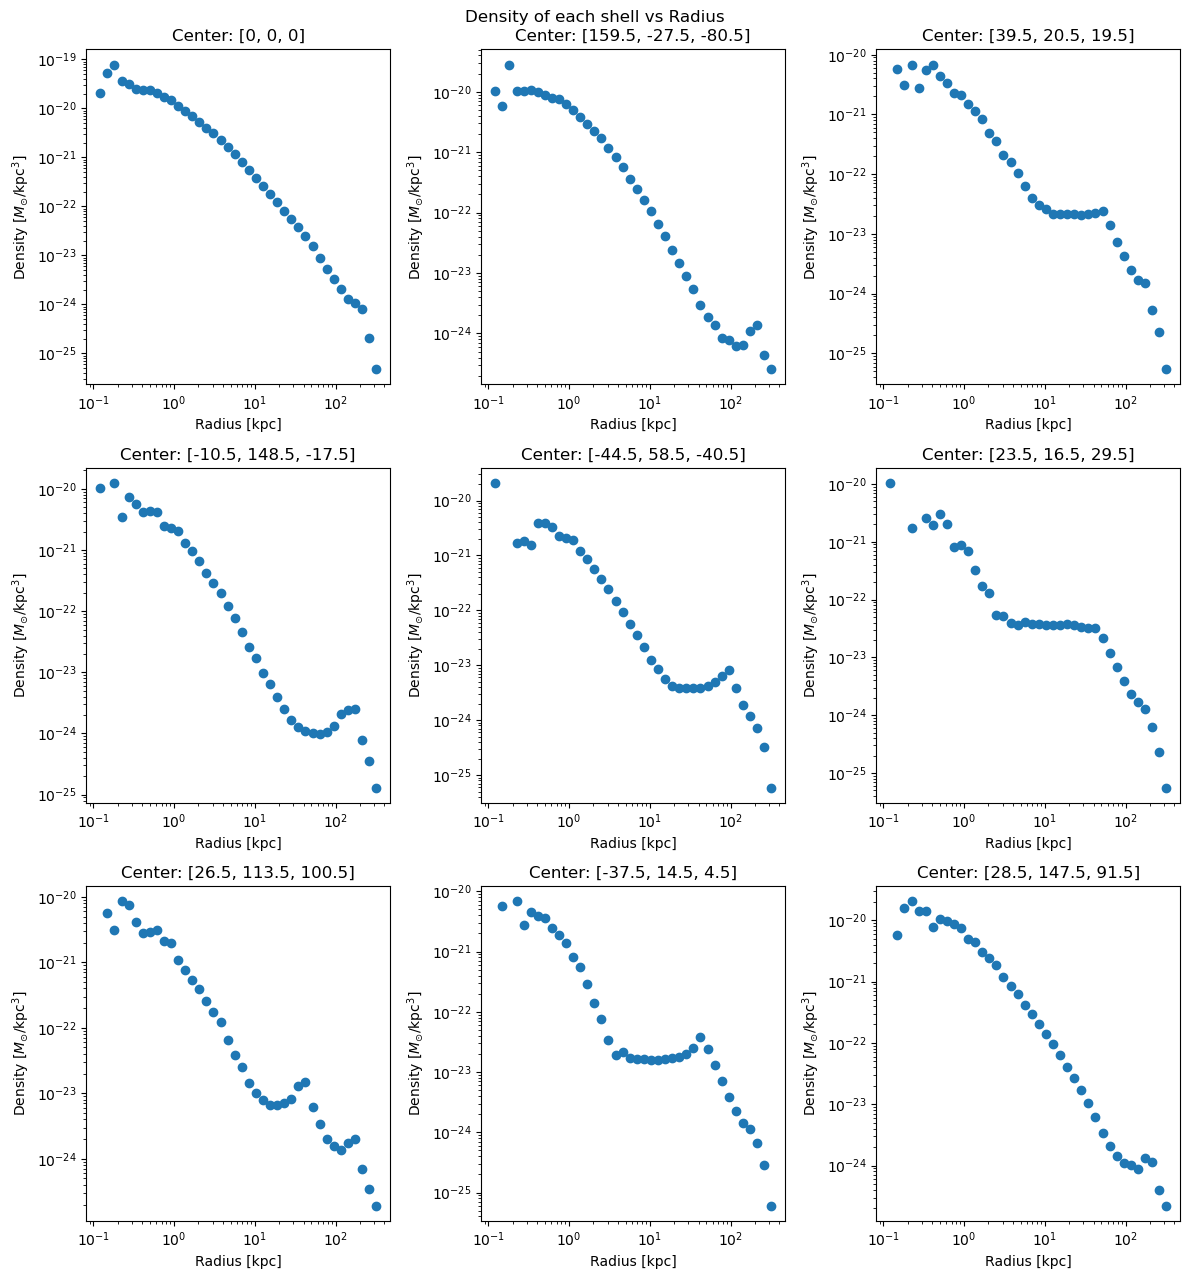

In [24]:
# plot the density of each shell as a function of the radius
# 9 subolots for 9 centers

fig, axes = plt.subplots(3, 3, figsize=(12, 13))

for i in range(3):
    for j in range(3):
        axes[i,j].plot(R[1:], rho_shell[i*3+j], 'o')
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('Radius [kpc]')
        axes[i,j].set_ylabel('Density [$M_{\odot}$/kpc$^3$]')
        axes[i,j].set_title('Center: %s' % centers[i*3+j])


plt.suptitle('Density of each shell vs Radius')
plt.tight_layout()
plt.show()

### **Task 5** Find the critical density, Ωcrit,0, at redshift 0 in a Planck15 cosmology, for example by using the astropy package.


$$\rho_{crit,0} = \frac{3H^2}{8\pi G}$$
$$\Omega_{crit,0} = \frac{\rho}{\rho_{crit,0}}$$

In [25]:
from astropy.cosmology import Planck15
import astropy.units as u

rho_crit0 = Planck15.critical_density0.si
print(rho_crit0)

8.619160453017514e-27 kg / m3


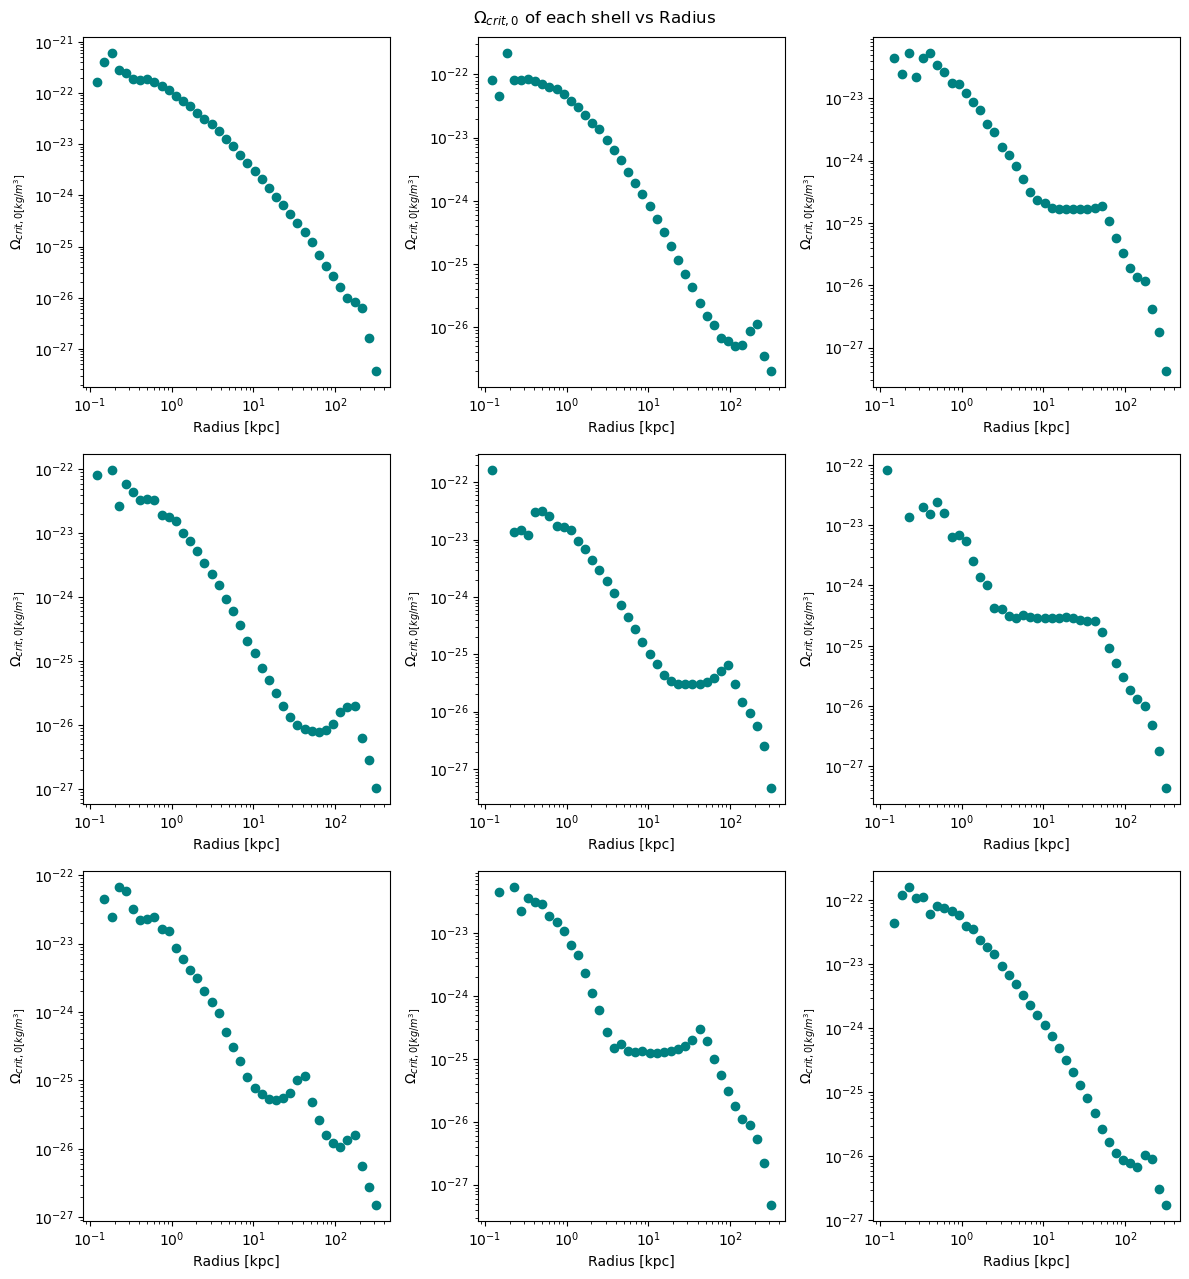

In [26]:
# These are all about shell densities

omega_crit0 = np.zeros((len(centers), len(R)-1))
rho_shell_si = np.zeros((len(centers), len(R)-1))

for i in range(len(centers)):
    rho_shell_si[i] = rho_shell[i] * 6.772E-29  # convert to kg/m^3
    omega_crit0[i] = rho_shell_si[i] / rho_crit0.value

# 9 subplots for 9 centers
fig, axes = plt.subplots(3, 3, figsize=(12, 13))

for i in range(3):
    for j in range(3):
        axes[i,j].plot(R[1:], omega_crit0[i*3+j], 'o', color = 'teal')
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('Radius [kpc]')
        axes[i,j].set_ylabel('$\Omega_{crit,0 [kg/m^3]}$')
plt.suptitle('$\Omega_{crit,0}$ of each shell vs Radius')
plt.tight_layout()
plt.show()

### **Task 6** Calculate the total mass (Mtot) inside a given radius (R) for the above dark matter halo.

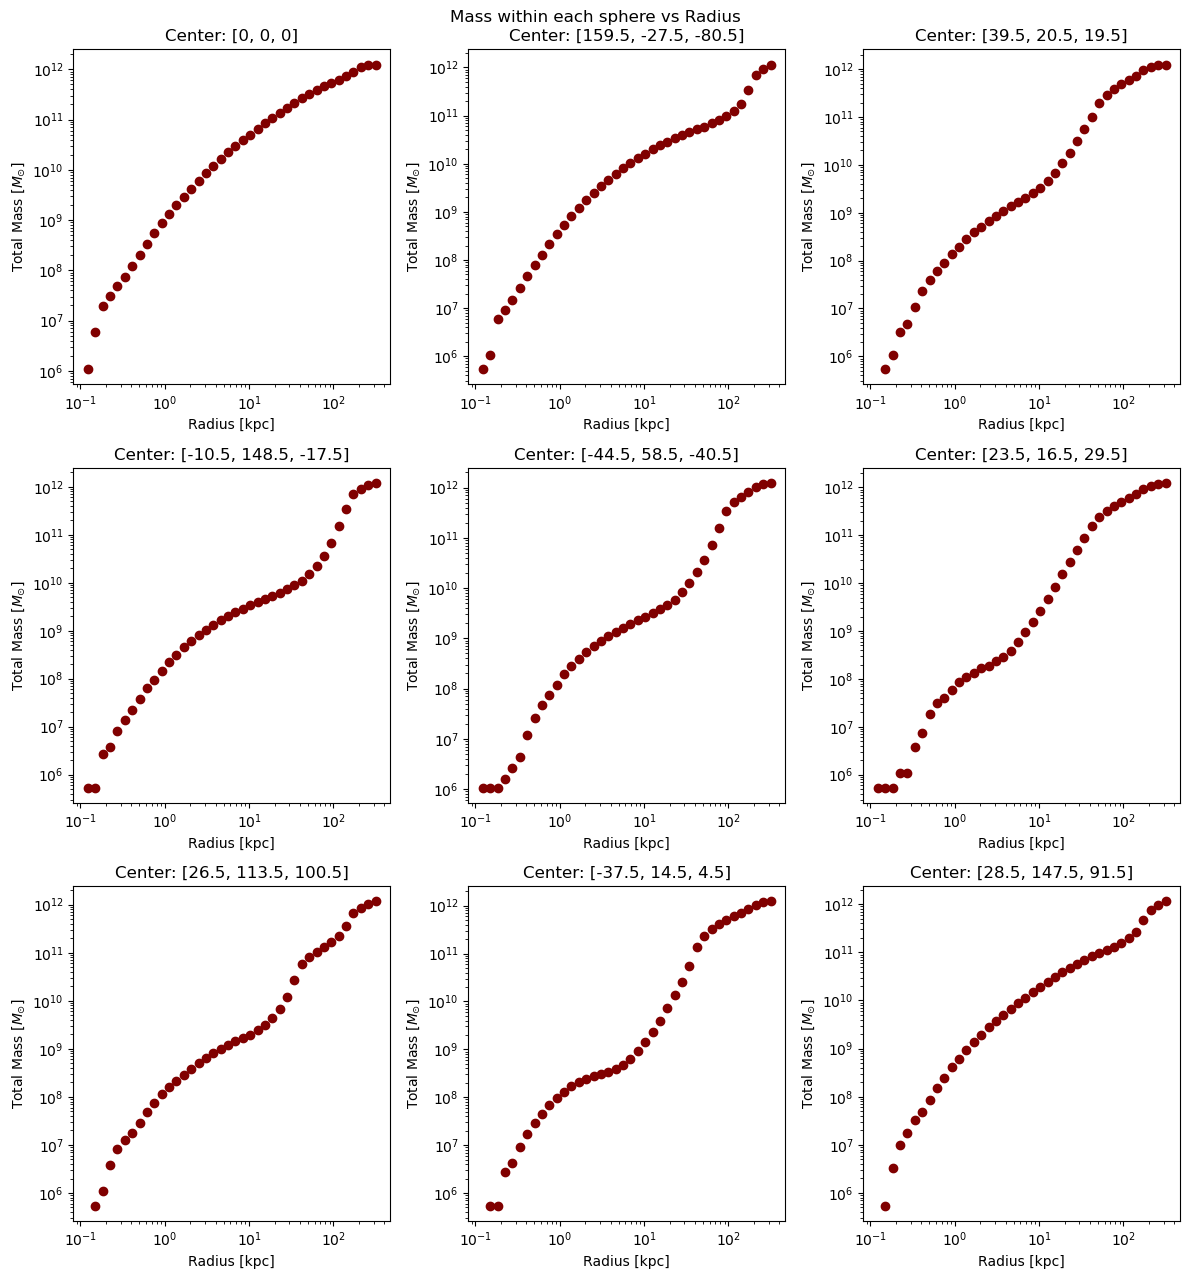

In [27]:
Mtot = np.zeros((len(centers),len(R)-1))
for i in range(len(centers)):
    Mtot[i] = np.cumsum(MassInShell[i]) # in solar masses

# 9 subplots for 9 centers
fig, axes = plt.subplots(3, 3, figsize=(12, 13))

for i in range(3):
    for j in range(3):
        axes[i,j].plot(R[1:], Mtot[i*3+j], 'o', color = 'maroon')
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('Radius [kpc]')
        axes[i,j].set_ylabel('Total Mass [$M_{\odot}$]')
        axes[i,j].set_title('Center: %s' % centers[i*3+j])


plt.suptitle('Mass within each sphere vs Radius')
plt.tight_layout()
plt.show()


### **Task 7** Solve the equation 200Ωcrit,0 = Mtot/(34πR3) for the above halo (numerically solve for R). Determine M200 and R200.

An estimate of radius and mass of a cosmological halo (M200 and R200)
A commonly used measure of a halo’s radius is R200, which is the radius inside which the mean density is 200 times the critical density of the universe. M200 is the total mass inside R200.

# **Feedback** #3
On page 21, I guess you should replace

/200*omega_crit0[i][j]
with

/(200*omega_crit0[i][j])

When you have updated #1 

/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_26432/1334369147.py:6: RuntimeWarning: invalid value encountered in scalar divide
  difference[i][j] = (200*omega_crit0[i][j] - Mtot[i][j]*6.772E-29/(4.0/3.0*np.pi*R[j].value**3))/(200*omega_crit0[i][j])
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_26432/1334369147.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  difference[i][j] = (200*omega_crit0[i][j] - Mtot[i][j]*6.772E-29/(4.0/3.0*np.pi*R[j].value**3))/(200*omega_crit0[i][j])
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_26432/1334369147.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 300)
/var/folders/6m/zf_f5yss4dxc7yj9tl4kmfnc0000gn/T/ipykernel_26432/1334369147.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


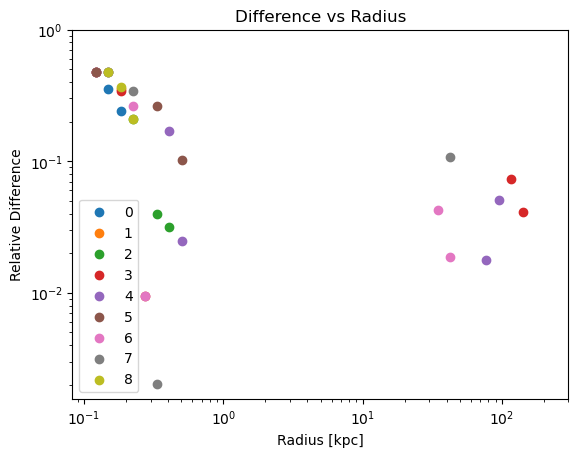

In [28]:
# first, plot to see the scale of the differences

difference = np.zeros((len(centers), len(R)-1))
for i in range(len(centers)):
    for j in range(len(R)-1): 
        difference[i][j] = (200*omega_crit0[i][j] - Mtot[i][j]*6.772E-29/(4.0/3.0*np.pi*R[j].value**3))/(200*omega_crit0[i][j])
        ### updated the error in calculation
        
    plt.scatter(R[1:],difference[i],label=i)

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, 300)
plt.ylim(0, 1)
plt.xlabel('Radius [kpc]')
plt.ylabel('Relative Difference')
plt.title('Difference vs Radius')
plt.show()

##### Now I feel like the question is using Omega (density parameter, supposedly) when it should be using rho, the density. The equation given in the question does not make sense since Omega is dimensionless.
$$ 200 \Omega_{crit,0} = \frac{M_{tot}}{\frac{4}{3} \pi R^3} ???$$
$$ \rightarrow 200 \rho_{crit,0} = \frac{M_{tot}}{\frac{4}{3} \pi R^3 }$$

##### I will use rho_crit0 instead of omega. The goal is to find M that satisfies the equation below.
$$ M = 200\rho_{crit,0}\frac{4}{3}\pi R^3$$

In [29]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

R200_m = np.zeros(len(centers))
M200_kg = np.zeros(len(centers))

# convet to SI units
R_m = R.to(u.m)
Mtot_kg = Mtot * const.M_sun.si

# interpolate and solve for R200
for i in range(len(centers)):
    f = interp1d(R_m[1:] , Mtot_kg[i], kind='cubic',fill_value='extrapolate')
    R200_m[i] = (fsolve(lambda x: f(x) - 200*rho_crit0.value*4.0*np.pi*x**3/3,R_m[-1]))
    M200_kg[i] = f(R200_m[i])

print('R200 in m:\n',R200_m)
print('M200 in kg:\n',M200_kg)

R200 in m:
 [6.77671102e+21 3.05599066e+21 6.72249288e+21 6.23674246e+21
 6.57315305e+21 6.72493426e+21 5.98567162e+21 6.64046361e+21
 3.98273088e+21]
M200 in kg:
 [2.24719350e+42 2.06081800e+41 2.19368681e+42 1.75168900e+42
 2.05071262e+42 2.19607769e+42 1.54853930e+42 2.11435922e+42
 4.56169721e+41]


### **Task 8** Add a circle indicating R200 to the figure from Task 2.

In [30]:
# unit conversion
R200_kpc = R200_m / 3.086E+19
M200_Msun = (M200_kg / const.M_sun.si.value)

print('R200 in kpc:\n',R200_kpc)
print('M200 in Msun:\n',M200_Msun)

R200 in kpc:
 [219.59530201  99.02756521 217.83839534 202.09794114 212.99912667
 217.91750678 193.96213923 215.18028538 129.05803246]
M200 in Msun:
 [1.13014602e+12 1.03641509e+11 1.10323673e+12 8.80949661e+11
 1.03133295e+12 1.10443914e+12 7.78782746e+11 1.06334174e+12
 2.29414332e+11]


# **Feedback** #2
Just calculate the M200 and R200 for the main cluster - it is not necessary for the subhalos.

### Doing the above again (Feedback#2)

[-1.00989718e+04 -3.03506882e+04 -5.42731046e+04 -4.69521812e+04
 -4.09563226e+04 -3.41815901e+04 -2.98283054e+04 -2.78236286e+04
 -2.51100284e+04 -2.20917968e+04 -1.92195231e+04 -1.58335430e+04
 -1.29695217e+04 -1.04789665e+04 -8.28025043e+03 -6.46919654e+03
 -5.04008589e+03 -3.86115788e+03 -2.89952142e+03 -2.13993285e+03
 -1.54922703e+03 -1.10745854e+03 -7.91525995e+02 -5.60180834e+02
 -3.92381414e+02 -2.71989608e+02 -1.87498003e+02 -1.28769681e+02
 -8.80839150e+01 -5.96388359e+01 -3.95681518e+01 -2.54653649e+01
 -1.60300984e+01 -9.93164945e+00 -5.97328816e+00 -3.42451031e+00
 -1.93525937e+00 -9.96480670e-01 -1.92722267e-01  3.25320862e-01]
[1.22320712e-01 1.49623566e-01 1.83020611e-01 2.23872114e-01
 2.73841963e-01 3.34965439e-01 4.09732110e-01 5.01187234e-01
 6.13055792e-01 7.49894209e-01 9.17275935e-01 1.12201845e+00
 1.37246096e+00 1.67880402e+00 2.05352503e+00 2.51188643e+00
 3.07255737e+00 3.75837404e+00 4.59726989e+00 5.62341325e+00
 6.87859912e+00 8.41395142e+00 1.02920053e+0

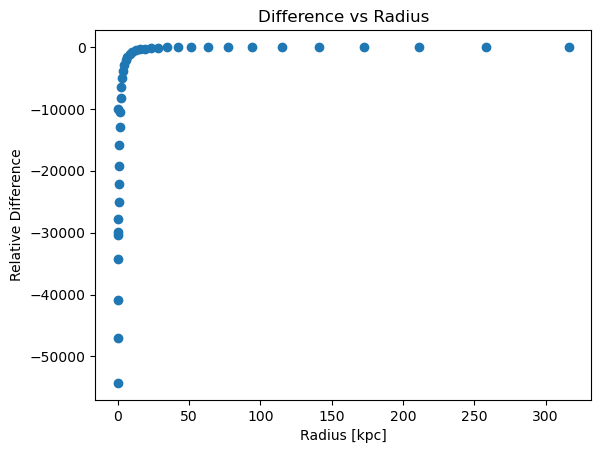

In [31]:
# first, plot to see the scale of the differences

difference_main = np.zeros(len(R)-1)

for j in range(len(R)-1):
    difference_main[j] = (200*rho_crit0.value - Mtot[0][j]*6.772E-29/(4.0/3.0*np.pi*R[j].value**3))/(200*rho_crit0.value)
    ### updated the error in calculation

print(difference_main)
print(R[1:])

plt.scatter(R[1:],difference_main)
plt.xlabel('Radius [kpc]')
plt.ylabel('Relative Difference')
plt.title('Difference vs Radius')
plt.show()

M200 for the main cluster:  1.130146e+12 Msun
R200 for the main cluster:  2.195953e+02 kpc


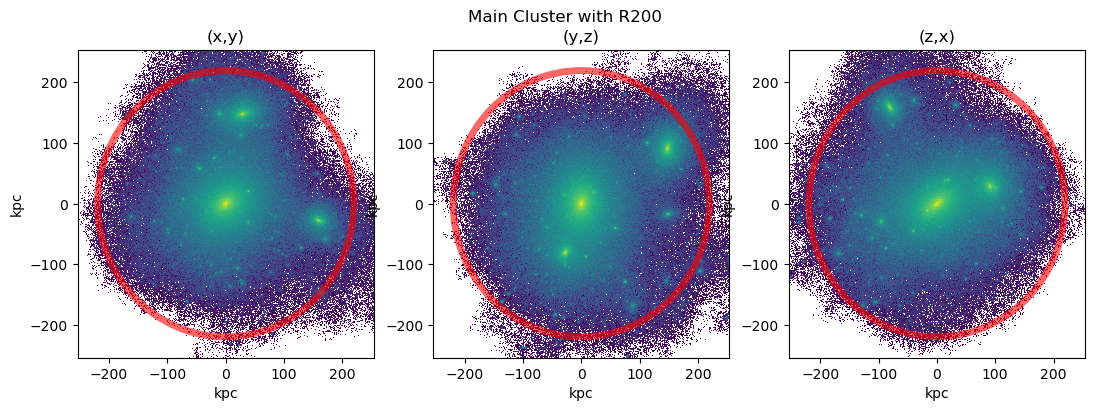

In [32]:
### M200 and R200 for the main cluster 

M200_main = M200_Msun[0]
R200_main = R200_kpc[0]

print('M200 for the main cluster: ', "{:e}".format(M200_main), 'Msun')
print('R200 for the main cluster: ', "{:e}".format(R200_main), 'kpc')

fig, axes = plt.subplots(1,3, figsize=(13, 4))
for i in range(3):
    axes[i].hist2d(Pos[:,i], Pos[:,(i+1)%3], bins = bins, range= ranges, weights=Mass, density=False, norm ='log')
    circle = plt.Circle((centers[0][i], centers[0][(i+1)%3]), R200_main, color='red', fill=False, linewidth=5, alpha=0.6)
    axes[i].add_patch(circle)
    axes[i].set_xlabel('kpc')
    axes[i].set_ylabel('kpc')

axes[0].set_title('(x,y)')
axes[1].set_title('(y,z)')
axes[2].set_title('(z,x)')

plt.suptitle('Main Cluster with R200')
plt.show()